In [1]:
import numpy as np
import matplotlib.pyplot as pl
import sparse_ir
import sys 
import math

In [2]:
T=0.1
wmax =1

beta = 1/T

In [3]:
#construction of the Kernel K

#Fermionic Basis

basisf = sparse_ir.FiniteTempBasis('F', beta, wmax)

matsf=sparse_ir.MatsubaraSampling(basisf)
tausf=sparse_ir.TauSampling(basisf)

#Bosonic Basis

basisb = sparse_ir.FiniteTempBasis('B', beta, wmax)
      
matsb = sparse_ir.MatsubaraSampling(basisb)
tausb = sparse_ir.TauSampling(basisb)

In [4]:
def rho(x):
    return 2/np.pi*np.sqrt(1-(x/wmax)**2)

rho_l = basisf.v.overlap(rho, -wmax, wmax)

G_l_0 = -basisf.s*rho_l  


#We compute G_iw two times as we will need G_iw_0 as a constant later on

G_iw_0 = matsf.evaluate(G_l_0)
G_iw_f = matsf.evaluate(G_l_0)


In [5]:
#Iterations
i=0

#storage for E_iw to show convergence after iterations
E_iw_f_arr=[]

In [6]:
#Calculation of G_l_f using Least-Squares Fitting

G_l_f = matsf.fit(G_iw_f)

                
#G_tau,fermionic   

G_tau_f = tausf.evaluate(G_l_f)


In [7]:
#G_tau, bosonic

G_tau_b=np.einsum('lt,l->t',basisf.u(tausb.tau),G_l_f)

#G_tau_b=tausb.evaluate(G_l_f)

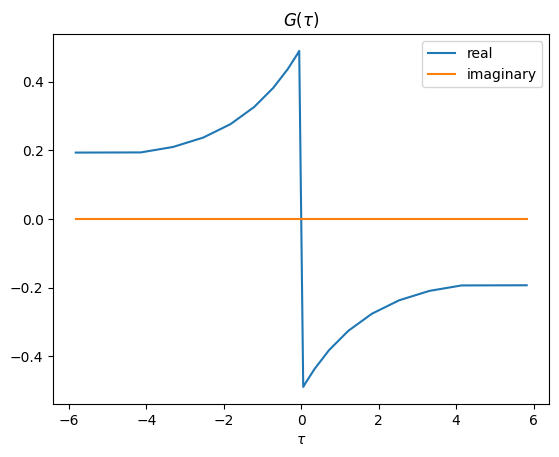

In [8]:
pl.plot(tausb.tau,G_tau_b.real,label='real')
pl.plot(tausb.tau,G_tau_b.imag,label='imaginary')

pl.title(r'$G(\tau)$')
pl.xlabel(r'$\tau$')
pl.legend()

In [9]:
#Polarisation P, bosonic

P_tau_b = - G_tau_b * (basisf.u(-tausb.tau).T @ G_l_f)

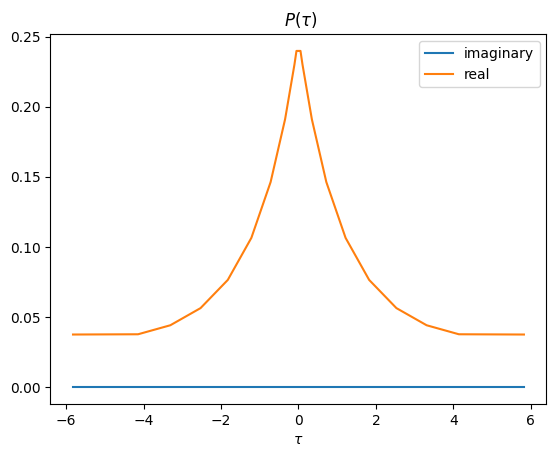

In [10]:
pl.plot(tausb.tau,P_tau_b.imag,label='imaginary')
pl.plot(tausb.tau,P_tau_b.real,label='real')

pl.title(r' $P(\tau)$')
pl.xlabel(r'$\tau$')
pl.legend()

In [11]:
#P_l, bosonic


P_l_b=tausb.fit(P_tau_b)

Text(0.5, 0, 'l')

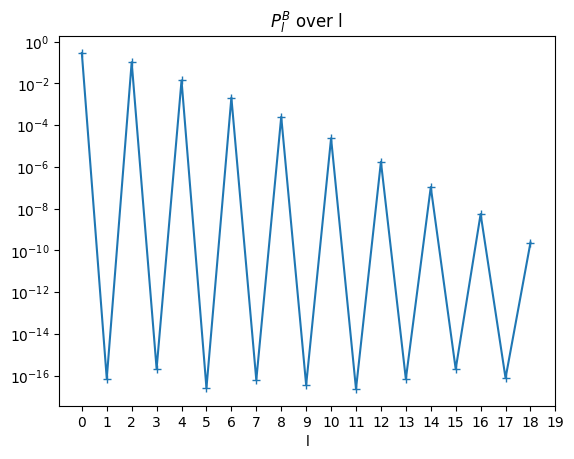

In [12]:
pl.semilogy(np.abs(P_l_b),'+-')
pl.title('$P_l^B$ over l ')
pl.xticks(range(0,20))
pl.xlabel('l')

In [13]:
#P_iw, bosonic

#P_iw_b=np.einsum('lv,l->v', basisb.uhat(matsb.wn),P_l_b)

P_iw_b=matsb.evaluate(P_l_b)

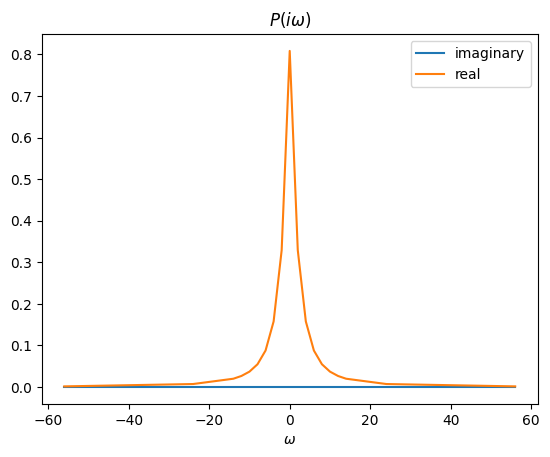

In [14]:
pl.plot(matsb.wn,P_iw_b.imag,label='imaginary')
pl.plot(matsb.wn,P_iw_b.real,label='real')
pl.title(r'$P(i\omega)$')
pl.xlabel(r'$\omega$')
pl.legend()

In [15]:
#W_iw, bosonic  

U=1/2

W_iw_b_U=U/(1-(U*P_iw_b))

W_iw_b=W_iw_b_U-U

#W_iw_b is the part depending on the frequency, any further calculations 
#will be done using this and not W_iw_b_U

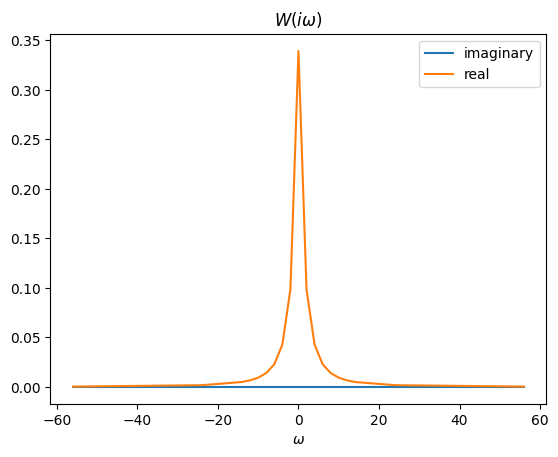

In [16]:
pl.plot(matsb.wn,W_iw_b.imag,label='imaginary')
pl.plot(matsb.wn,W_iw_b.real,label='real')
pl.title(r'$W(i\omega)$')
pl.xlabel(r'$\omega$')
pl.legend()

In [17]:
#W_l, bosonic

W_l_b=matsb.fit(W_iw_b)

Text(0.5, 0, 'l')

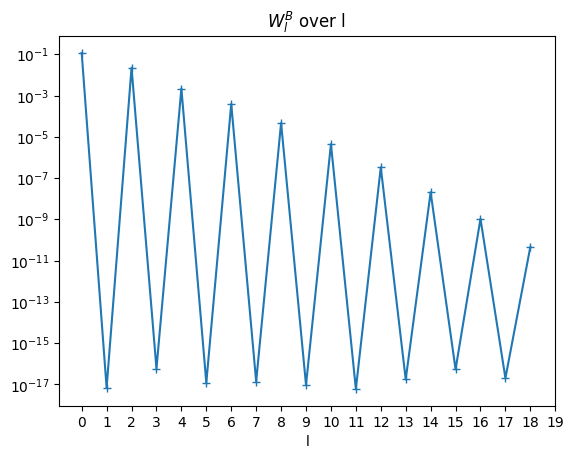

In [18]:
pl.semilogy(np.abs(W_l_b),'+-')
pl.title('$W_l^B$ over l ')
pl.xticks(range(0,20))
pl.xlabel('l')

In [19]:
#W_tau_f, fermionic

W_tau_f=np.einsum('lt,l->t',basisb.u(tausf.tau),W_l_b)

#W_tau_f=tausf.evaluate(W_l_b)

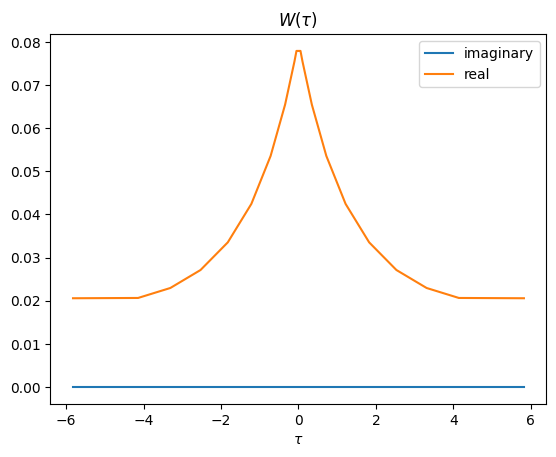

In [20]:
pl.plot(tausf.tau,W_tau_f.imag,label='imaginary')
pl.plot(tausf.tau,W_tau_f.real,label='real')
pl.title(r'$W(\tau)$')
pl.xlabel(r'$\tau$')
pl.legend()

In [21]:
#E_tau , fermionic   

E_tau_f=G_tau_f*W_tau_f

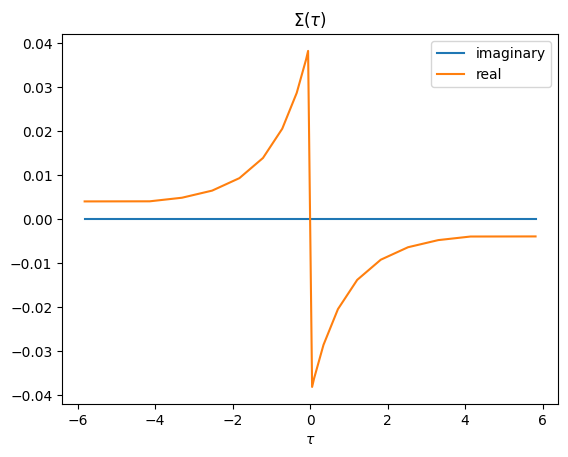

In [22]:
pl.plot(tausf.tau,E_tau_f.imag,label='imaginary')
pl.plot(tausf.tau,E_tau_f.real,label='real')
pl.title(r'$\Sigma(\tau)$')
pl.xlabel(r'$\tau$')
pl.legend()

In [23]:
#E_l, fermionic

E_l_f=tausf.fit(E_tau_f)

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
/var/folders/1t/fxgqx0n17z33mplwpw4n1d8r0000gn/T/ipykernel_57470/2200544827.py:2: SyntaxWarning: invalid escape sequence '\S'
  pl.title('$\Sigma_l^F$ over l ')


Text(0.5, 0, 'l')

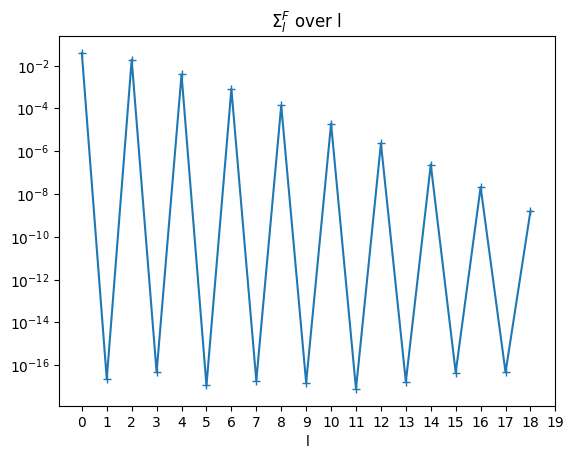

In [24]:
pl.semilogy(np.abs(E_l_f),'+-')
pl.title('$\Sigma_l^F$ over l ')
pl.xticks(range(0,20))
pl.xlabel('l')

In [25]:
#E_iw, fermionic

#E_iw_f=p.einsum('lw,l->w',basisf.uhat(matsf.wn),E_l_f)-U*(basisf.u(beta).T@G_l_f)

E_iw_f_U=matsf.evaluate(E_l_f)-U*(basisf.u(beta).T@G_l_f)
E_iw_f=matsf.evaluate(E_l_f)


#store E_iw_f of this iteration in E_iw_f_arr
E_iw_f_arr.append(E_iw_f_U)

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
/var/folders/1t/fxgqx0n17z33mplwpw4n1d8r0000gn/T/ipykernel_57470/1504367459.py:3: SyntaxWarning: invalid escape sequence '\S'
  ax[0].set_title('Imaginary part of $\Sigma(i\omega)$')
/var/folders/1t/fxgqx0n17z33mplwpw4n1d8r0000gn/T/ipykernel_57470/1504367459.py:6: SyntaxWarning: invalid escape sequence '\S'
  ax[1].set_title('Real part of $\Sigma(i\omega)$')


Text(0.5, 0, '$\\omega$')

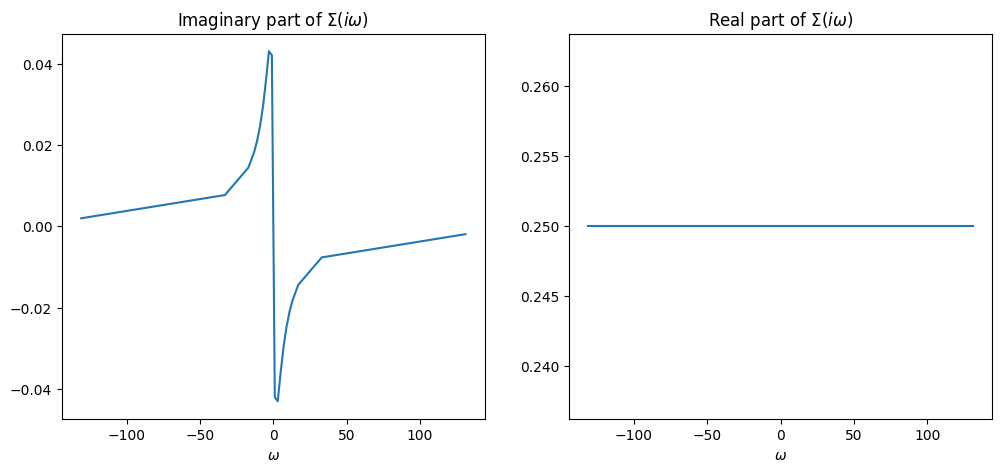

In [26]:
fig, ax = pl.subplots(1,2, figsize=(12,5) )
ax[0].plot(matsf.wn,E_iw_f_U.imag)
ax[0].set_title('Imaginary part of $\Sigma(i\omega)$')
ax[0].set_xlabel(r'$\omega$')
ax[1].plot(matsf.wn,E_iw_f_U.real)
ax[1].set_title('Real part of $\Sigma(i\omega)$')
ax[1].set_xlabel(r'$\omega$')

In [27]:
#G_iw, fermonic     -> Dyson Equation

G_iw_f=((G_iw_0)**-1-E_iw_f)**-1    

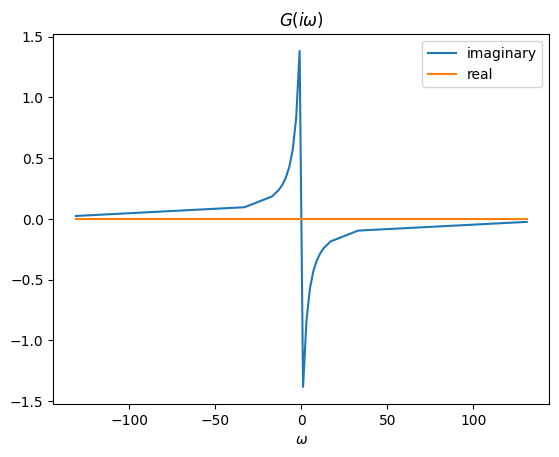

In [28]:
pl.plot(matsf.wn,G_iw_f.imag,label='imaginary')
pl.plot(matsf.wn,G_iw_f.real,label='real')
pl.title(r'$G(i\omega)$')
pl.xlabel(r'$\omega$')
pl.legend()

In [29]:
if (i>0):
    pl.plot(matsf.wn,E_iw_f_arr[i].imag,label='current')
    pl.title(r'$\Sigma(i\omega)$ in the current and previous iteration')
    pl.plot(matsf.wn,E_iw_f_arr[i-1].imag,'.',label='previous')
    pl.legend()
    pl.show()
    pl.plot(matsf.wn,np.abs(E_iw_f_arr[i]-E_iw_f_arr[i-1]))
    pl.title(r'$|\Sigma_i(i\omega)-\Sigma_{i-1}(i\omega)|$' )
    

In [30]:
#Iterations 
i+=1
print('full iterations: ',i)

full iterations: 

1

In [31]:
print(G_iw_f)

[-3.13806786e-19+0.02429373j  9.06724937e-18+0.09616324j
 -2.54780751e-17+0.18513256j -1.80526795e-17+0.24022776j
  1.94852549e-17+0.28186922j -1.51319184e-17+0.34036864j
 -8.54740334e-18+0.4278915j  -4.72595122e-17+0.57065346j
 -4.54124891e-17+0.83239627j -1.12374754e-17+1.38269615j
 -1.12374754e-17-1.38269615j -4.54124891e-17-0.83239627j
 -4.72595122e-17-0.57065346j -8.54740334e-18-0.4278915j
 -1.51319184e-17-0.34036864j  1.94852549e-17-0.28186922j
 -1.80526795e-17-0.24022776j -2.54780751e-17-0.18513256j
  9.06724937e-18-0.09616324j -3.13806786e-19-0.02429373j]